In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.interpolate import interp1d
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Times New Roman",
  "font.size": 10,
  "axes.labelsize": 10,
  "xtick.labelsize": 10,
  "ytick.labelsize": 10,
  "legend.fontsize": 8,
})
plt.style.use(['science', 'ieee', 'grid'])
from IPython.display import display
from sympy.printing import latex

### Leerlaufversuch: $U_q = f(I_E)$

In [2]:
# steigend
I_E_s = np.array([0.0, 0.1, 0.2, 0.4, 0.8, 1.2, 1.4, 1.6, 1.8, 2.0])
U_q_s = np.array([6.4, 15.9, 28.5, 52.35, 103.62, 151.8, 171.7, 191.7, 209.6, 225.2])

# fallend
I_E_f = np.array([1.8, 1.6, 1.4, 1.2, 0.8, 0.4, 0.2, 0.1, 0])
U_q_f = np.array([212.2, 197.3, 178.4, 157.4, 111, 59.6, 33.8, 19.24, 7.1])

data = []
I_E = []
U_q = []

for i in range(len(I_E_s)):
    I_E.append(I_E_s[i])
    U_q.append(U_q_s[i])
for j in range(len(I_E_f)):
    I_E.append(I_E_f[j])
    U_q.append(U_q_f[j])
for i in range(len(I_E)):
    data.append([I_E[i], U_q[i]])
# pd.DataFrame(data, columns=["$I_E[A]$", "$U_q[V]$"]).to_latex("tables/GM_Calculations.tex", index=False)
pd.DataFrame(data, columns=["$I_E[A]$", "$U_q[V]$"])


,$I_E[A]$,$U_q[V]$
0,0.0,6.40
1,0.1,15.90
2,0.2,28.50
3,0.4,52.35
4,0.8,103.62
5,1.2,151.80
6,1.4,171.70
7,1.6,191.70
8,1.8,209.60
9,2.0,225.20


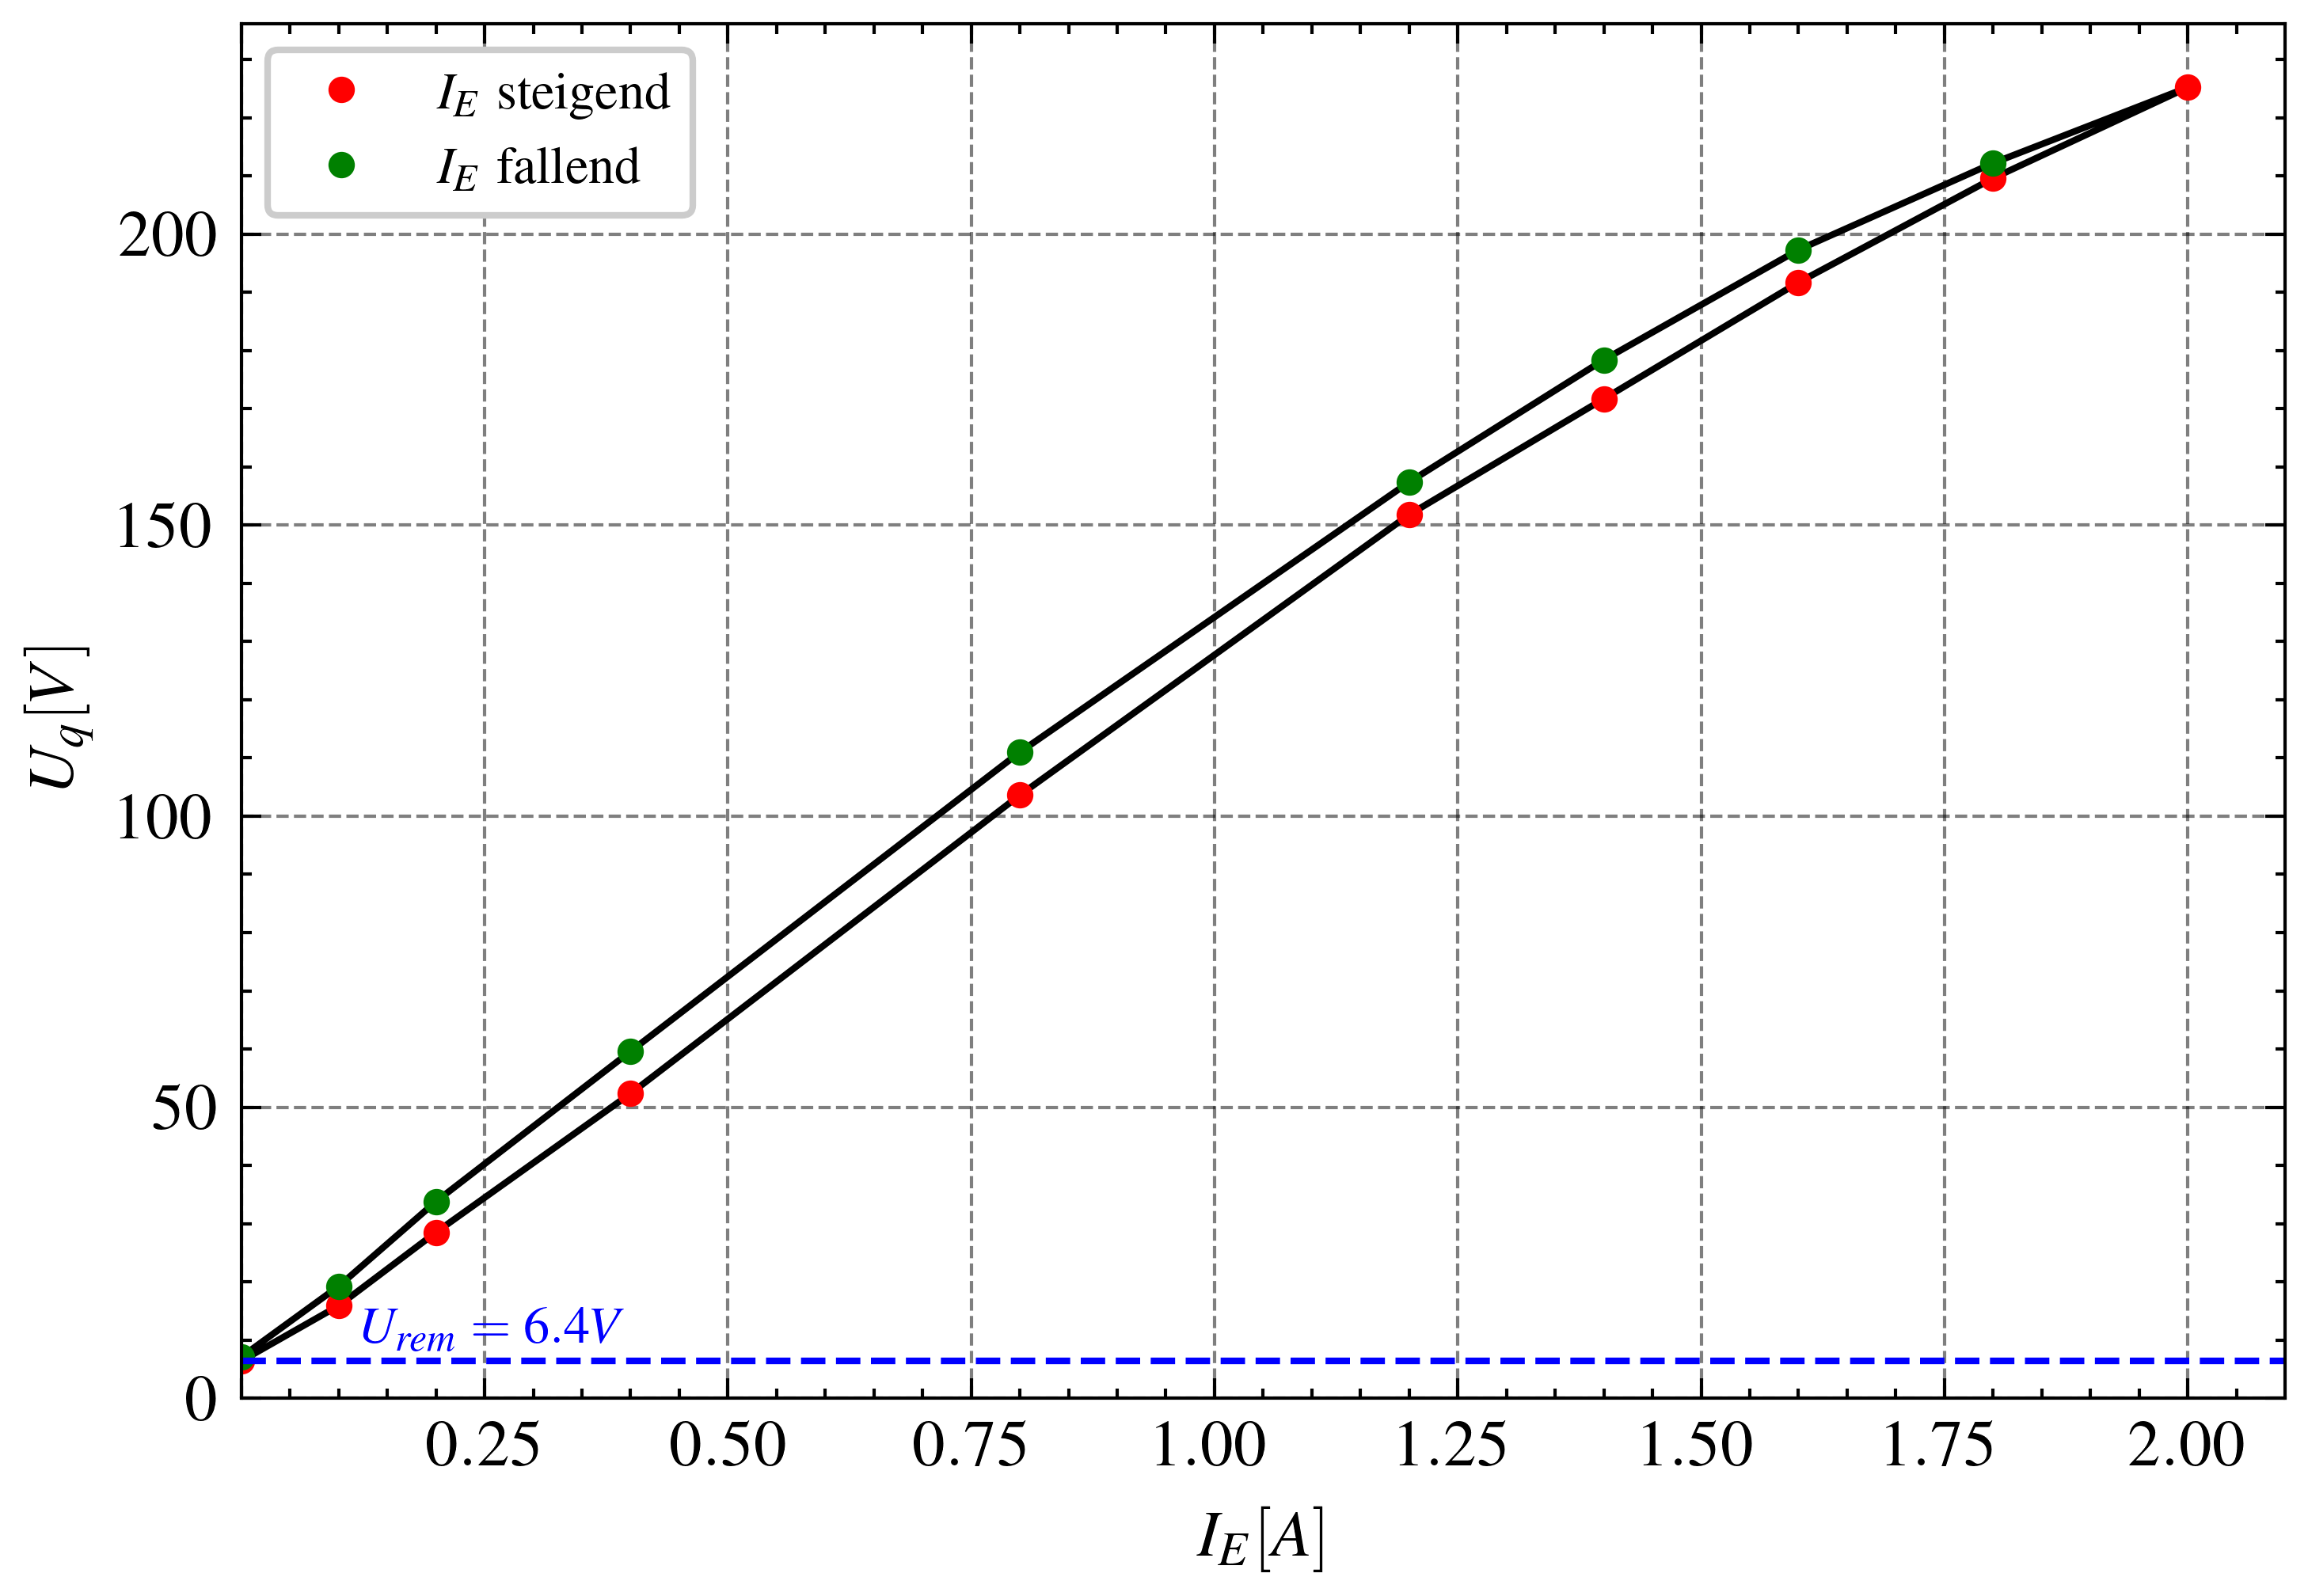

In [3]:
fig, ax = plt.subplots(figsize=(5, 3.5))
ax.plot(I_E, U_q, "-")
ax.plot(I_E_s, U_q_s, "r.", label="$I_E$ steigend")
ax.plot(I_E_f, U_q_f, "g.", label="$I_E$ fallend")
ax.axhline(y=U_q[0], color="b", linestyle="--")
ax.annotate(f"$U_{{rem}}={min(U_q)}V$", xy=(I_E[0], U_q[0]), xytext=(0.125, U_q[0]+3), color="b")

ax.set_xlabel("$I_E[A]$")
ax.set_ylabel("$U_q[V]$")
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
ax.get_xaxis().get_ticklabels()[0].set_visible(False)
ax.legend()
plt.tight_layout()
plt.savefig("plots/Leerlaufversuch_Uq_I_E.png", dpi=300)
